## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [2]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [3]:
df = pd.read_csv('/content/sample_data/QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [4]:
print("First 5 rows:")
display(df.head())

print("\nLast 5 rows:")
display(df.tail())

First 5 rows:


,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124



Last 5 rows:


,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [6]:
print("\nDataFrame dimensions (rows, columns):")
print(df.shape)


DataFrame dimensions (rows, columns):
(1991, 3)


**Challenge**: Count the number of entries in each column of the dataframe

In [5]:
print("\nNumber of entries per column:")
display(df.count())


Number of entries per column:


,0
DATE,1991
TAG,1991
POSTS,1991


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [7]:
total_posts_per_language = df.groupby('TAG')['POSTS'].sum()

print("Total number of posts per language:")
display(total_posts_per_language)

most_popular_language = total_posts_per_language.idxmax()
highest_post_count = total_posts_per_language.max()

print(f"\nProgramming language with the highest total number of posts: {most_popular_language} ({highest_post_count} posts)")

Total number of posts per language:


,POSTS
TAG,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286



Programming language with the highest total number of posts: javascript (2056510 posts)


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [8]:
months_per_language = df.groupby('TAG')['DATE'].count()

print("Number of months of data per language:")
display(months_per_language)

language_fewest_months = months_per_language.idxmin()
fewest_months_count = months_per_language.min()

print(f"\nLanguage with the fewest months with an entry: {language_fewest_months} ({fewest_months_count} months)")

Number of months of data per language:


,DATE
TAG,
assembly,144
c,144
c#,145
c++,144
delphi,144
go,129
java,144
javascript,144
perl,144



Language with the fewest months with an entry: go (129 months)


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [9]:
df['DATE'] = pd.to_datetime(df['DATE']).dt.date

print("DataFrame after converting 'DATE' column to datetime:")
display(df.head())

DataFrame after converting 'DATE' column to datetime:


,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


## Data Manipulation



In [11]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS').fillna(0)

print("Dimensions of reshaped_df (rows, columns):")
print(reshaped_df.shape)

print("\nHead of reshaped_df:")
display(reshaped_df.head())

Dimensions of reshaped_df (rows, columns):
(145, 14)

Head of reshaped_df:


TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [12]:
print("Dimensions of reshaped_df (rows, columns):")
print(reshaped_df.shape)

print("\nColumn names of reshaped_df:")
print(reshaped_df.columns)

print("\nHead of reshaped_df:")
display(reshaped_df.head())

Dimensions of reshaped_df (rows, columns):
(145, 14)

Column names of reshaped_df:
Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

Head of reshaped_df:


TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [13]:
reshaped_df.fillna(0, inplace=True)
print("DataFrame after filling NaN values with 0:")
display(reshaped_df.head())

DataFrame after filling NaN values with 0:


TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [14]:
print("Number of entries per programming language in reshaped_df:")
display(reshaped_df.count())

Number of entries per programming language in reshaped_df:


,0
TAG,
assembly,145
c,145
c#,145
c++,145
delphi,145
go,145
java,145
javascript,145
perl,145


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

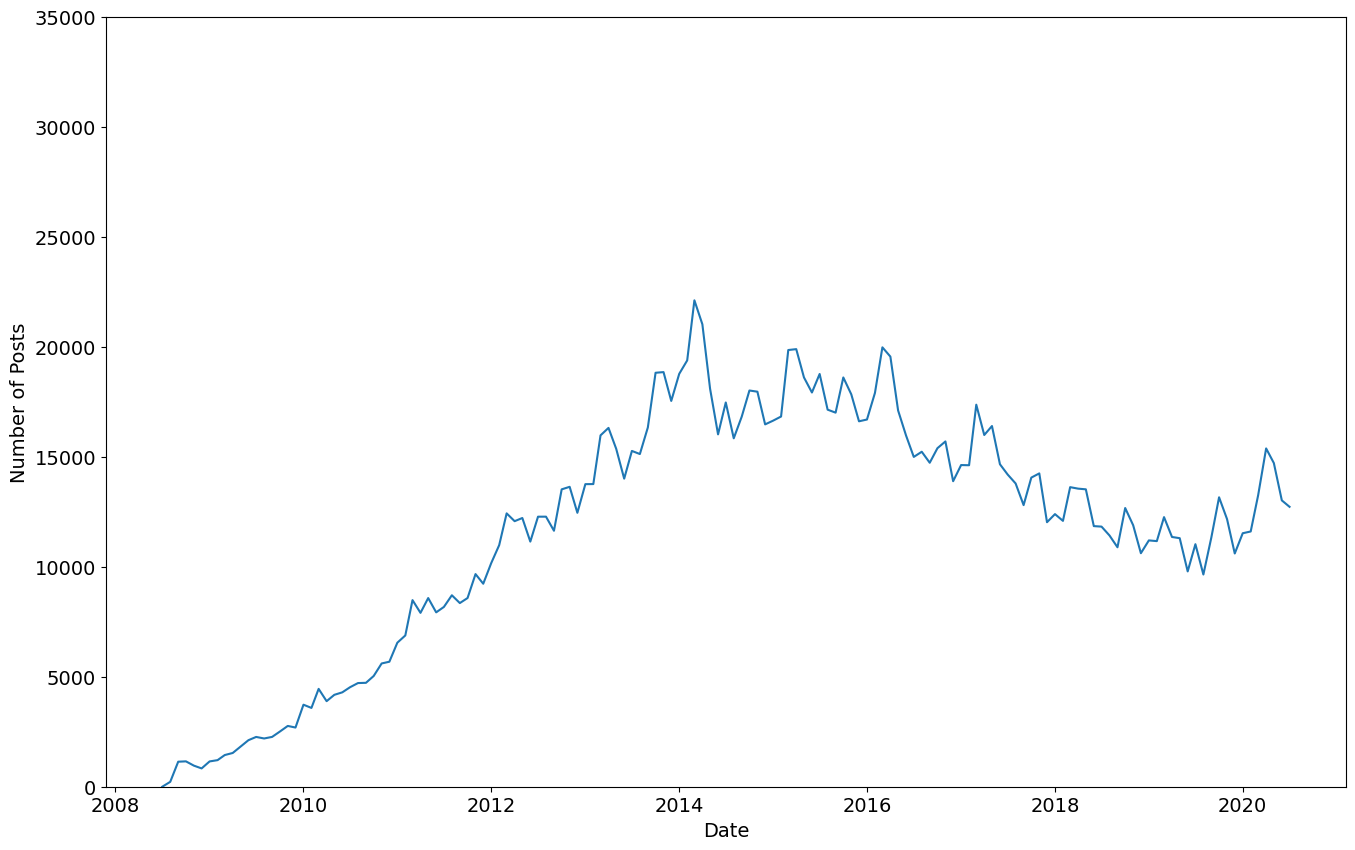

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

plt.plot(reshaped_df.index, reshaped_df['java'])
plt.show()

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

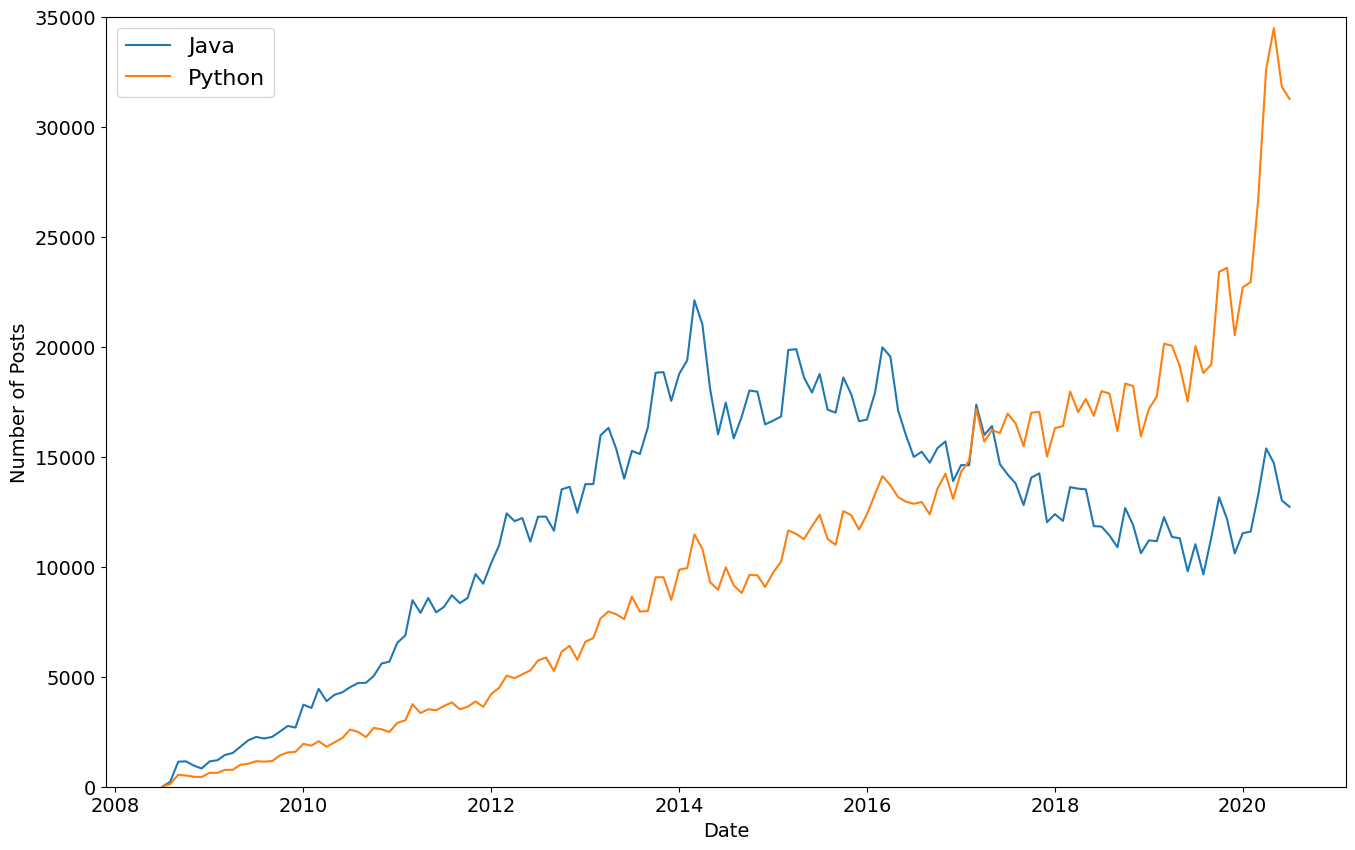

In [16]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

plt.plot(reshaped_df.index, reshaped_df['java'], label='Java')
plt.plot(reshaped_df.index, reshaped_df['python'], label='Python')
plt.legend(fontsize=16)

plt.show()

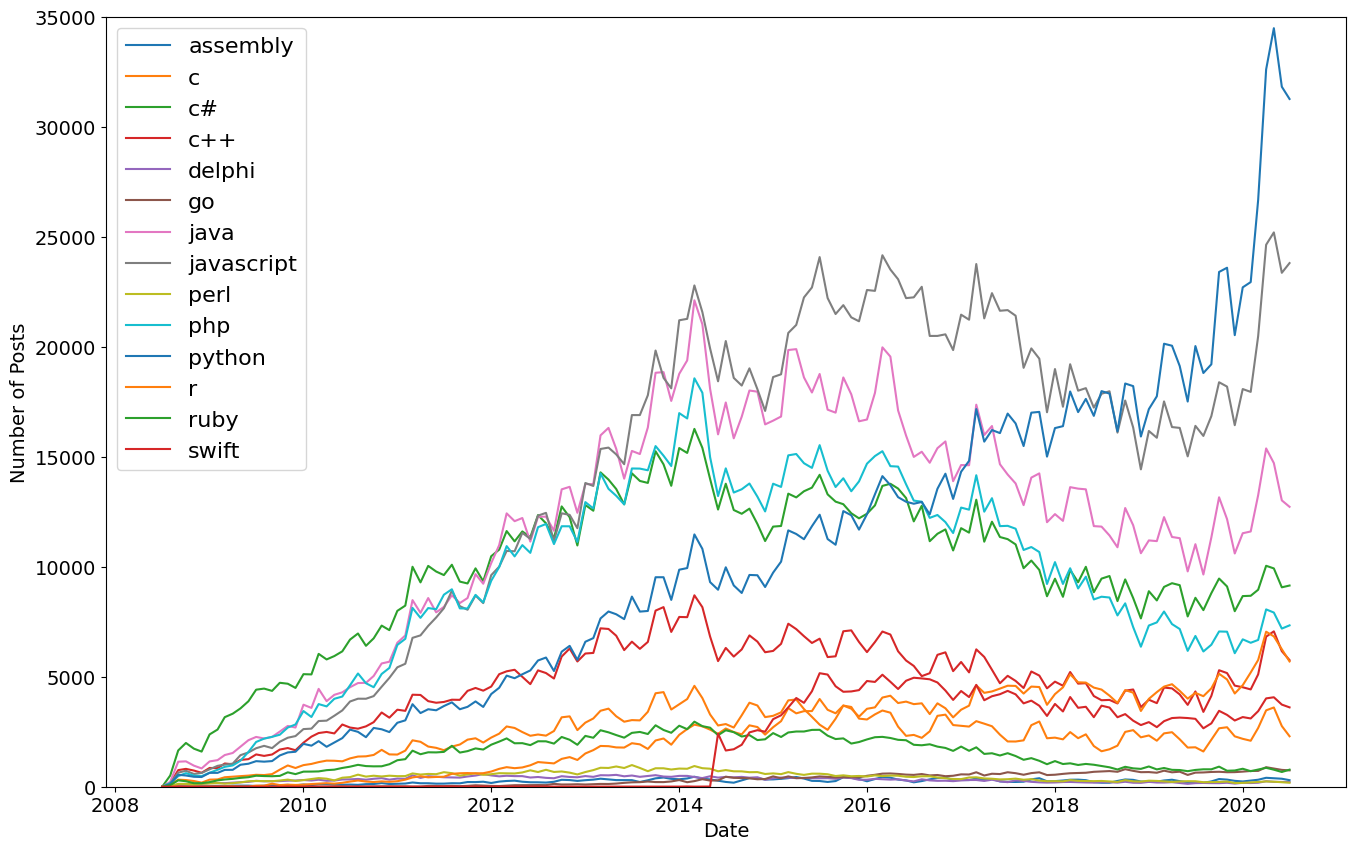

In [17]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# Plot all columns using a for loop
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], label=column)

plt.legend(fontsize=16)
plt.show()

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

DataFrame after calculating rolling mean:


TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


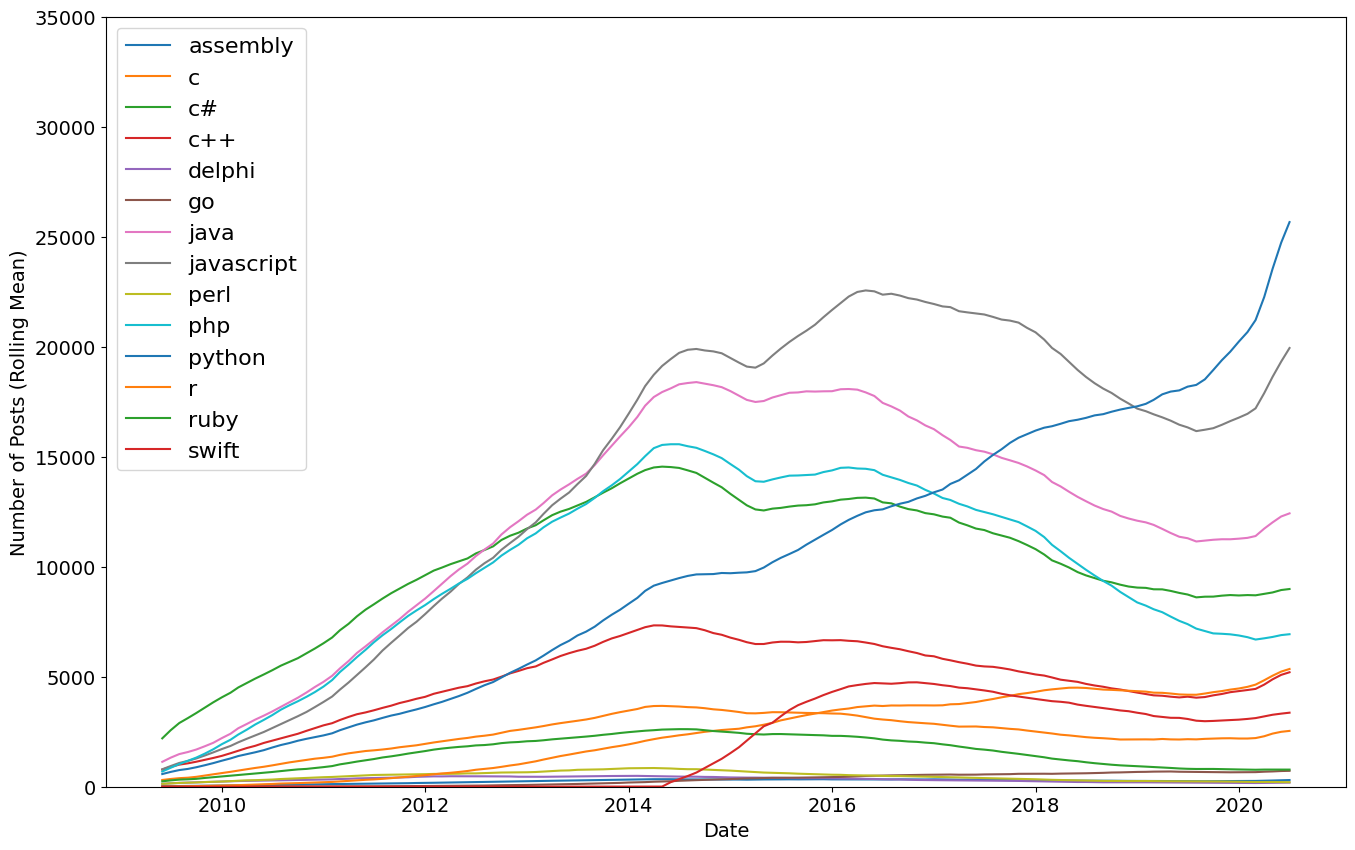

In [19]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts (Rolling Mean)', fontsize=14)
plt.ylim(0, 35000)

# Plot all columns of the rolling mean DataFrame
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], label=column)

plt.legend(fontsize=16)
plt.show()